# Quasi-particles

## Tutorial 1

Spin chain with Ionized copper

The shortest lattice parameter along the a-axis will give the first neighbor bonds along this axis. After defining the lattice, we add a magnetic Cu+ ion with spin S=1 at the origin of the unit cell and plot the lattice.

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!


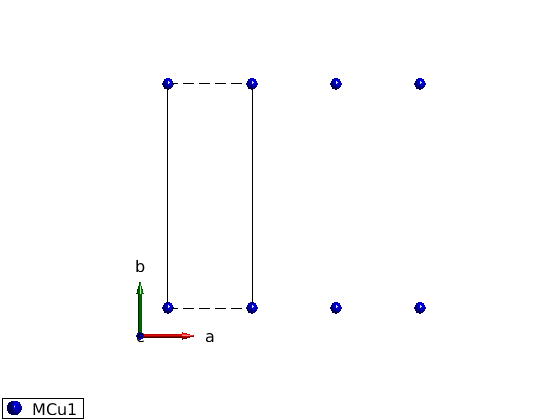

In [1]:
FMchain = spinw;
FMchain.genlattice('lat_const',[3 8 8],'angled',[90 90 90])
FMchain.addatom('r', [0 0 0],'S', 1,'label','MCu1','color','blue')
FMchain.plot('range',[3 1 1])

List of bonds

To consider bonds up to 7 Angstrom length we use the sw.gencoupling() function. Since no symmetry operators are defined, it sorts all bonds according to increasing length, all bonds are equivalent that has the same length within an error bar (0.001 Angstrom by default).

In [2]:
FMchain.gencoupling('maxDistance',7)

% list the 1st and 2nd neighbor bonds
FMchain.table('bond',1:2)

Creating the bond list (maxDistance = 7 , nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!

ans =

  2x10 table

    idx    subidx        dl             dr         length     matom1     idx1     matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    ________    ____    ________    ____    ______________________________________

     1       1       1    0    0    1    0    0      3       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}
     2       1       2    0    0    2    0    0      6       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}



Spin Hamiltonian

We create a matrix with a label 'Ja', ferromagnetic heisenberg interaction, J = -1 meV and assing it to the first neghbor bonds as spin-spin exchange interaction: J*S(i)*S(i+1). And plot the crystal structure with the added bonds.

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!


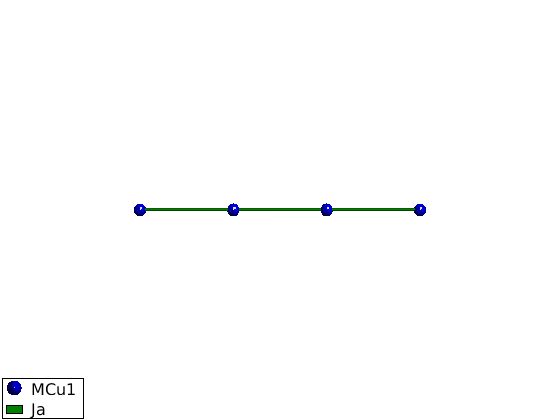

In [3]:
FMchain.addmatrix('value',-eye(3),'label','Ja','color','green')
FMchain.addcoupling('mat','Ja','bond',1);
plot(FMchain,'range',[3 0.2 0.2],'cellMode','none','baseMode','none')

Ferromagnetic structure

The classical magnetic ground state of the previously defined Hamiltonian is where every spin have the same direction, the direction is arbitrary since the Hamiltonian is isotropic. We use the following parameters:
    
    Magnetic ordering wave vector k = (0 0 0)
    
    There is a single spin per unit cell S = [0 1 0]
    
    An arbitrary normal vector to the spin n = [1 0 0]

Magnetic structure:

ans =

  1x7 table

    num     matom      idx    S     realFhat          pos           kvect   
    ___    ________    ___    _    ___________    ___________    ___________

     1     {'MCu1'}     1     1    0    1    0    0    0    0    0    0    0

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!


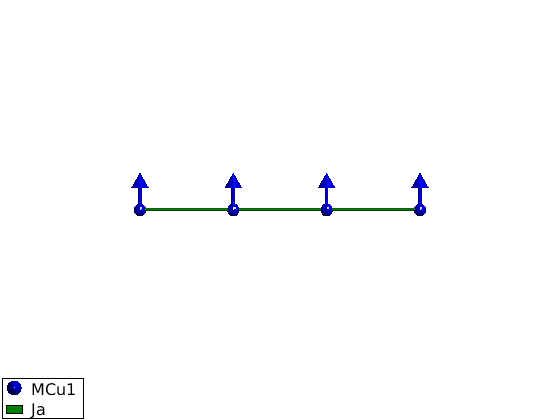

In [4]:
FMchain.genmagstr('mode','direct', 'k',[0 0 0],'n',[1 0 0],'S',[0; 1; 0]);

disp('Magnetic structure:')
FMchain.table('mag')
plot(FMchain,'range',[3 0.9 0.9],'baseMode','none','cellMode','none')

Energy of the ground state

The spinw.energy() function gives the ground state energy per spin, the value is dinamically calculated at every call.

In [5]:
FMchain.energy
assert(FMchain.energy == -1)

Ground state energy: -1.000 meV/spin.


Spin wave dispersion and spin-spin correlation

We calculate spin wave dispersion and correlation function along the chain, momentum transfer value is Q = (H 0 0). Then we calculate the neutron scattering cross section and select 'Sperp' the neutron scattering intensity for plotting. Then we plot spin wave dispersion and the value of the correlation function with the 1-Q^2 neutron scattering cross section in units of hbar/spin.

FMspec = FMchain.spinwave({[0 0 0] [1 0 0]},'hermit',false);
FMspec = sw_neutron(FMspec);
FMspec = sw_egrid(FMspec,'component','Sperp');

figure;
subplot(2,1,1)
sw_plotspec(FMspec,'mode',1,'colorbar',false)
axis([0 1 0 5])
subplot(2,1,2)
sw_plotspec(FMspec,'mode',2)
axis([0 1 0 2])
swplot.subfigure(1,3,1)


Powder average spectrum

We calculate powder spectrum for Q = 0:2.5 Angstrom^-1 100 steps resolution 1000 random Q points for every step. Then we plot the spectrum convoluted with 0.1 meV Gaussian along energy.

Calculating powder spectra...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
  1.00%, remained: 000:00:16 (HH:MM:SS).
  2.00%, remained: 000:00:12 (HH:MM:SS).
  3.00%, remained: 000:00:11 (HH:MM:SS).
  4.00%, remained: 000:00:12 (HH:MM:SS).
  5.00%, remained: 000:00:11 (HH:MM:SS).
  6.00%, remained: 000:00:11 (HH:MM:SS).
  7.00%, remained: 000:00:10 (HH:MM:SS).
  8.00%, remained: 000:00:09 (HH:MM:SS).
  9.00%, remained: 000:00:09 (HH:MM:SS).
 10.00%, remained: 000:00:08 (HH:MM:SS).
 11.00%, remained: 000:00:08 (HH:MM:SS).
 12.00%, remained: 000:00:08 (HH:MM:SS).
 13.00%, remained: 000:00:08 (HH:MM:SS).
 14.00%, remained: 000:00:08 (HH:MM:SS).
 15.00%, remained: 000:00:07 (HH:MM:SS).
 16.00%, remained: 000:00:07 (HH:MM:SS).
 17.00%, remained: 000:00:07 (HH:MM:SS).
 18.00%, remained: 000:00:07 (HH:MM:SS).
 19.00%, remained: 000:00:07 (HH:MM:SS).

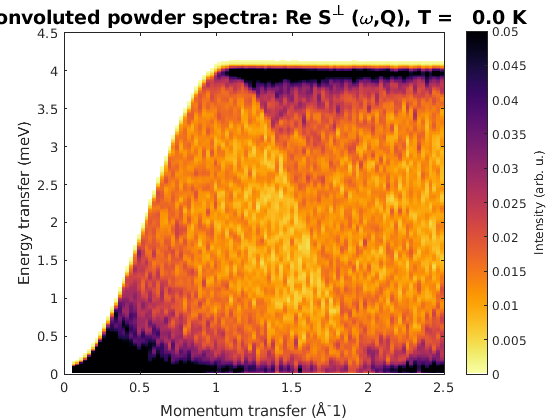

In [7]:
FMpowspec = FMchain.powspec(linspace(0,2.5,100),'Evect',linspace(0,4.5,250),'nRand',1000,'hermit',false);
figure;
sw_plotspec(FMpowspec,'dE',0.1)
axis([0 2.5 0 4.5]);
caxis([0 .05]);

## Tutorial 2

Lattice

Magnetic lattice:

ans =

  1x4 table

     matom      idx    S        pos    
    ________    ___    _    ___________

    {'MCu1'}     1     1    0    0    0

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!


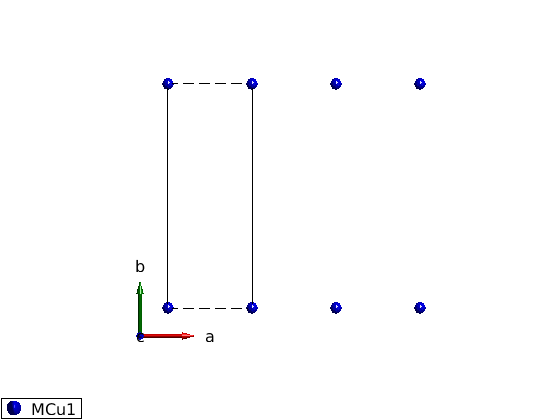

In [8]:
AFMchain = spinw;
AFMchain.genlattice('lat_const',[3 8 8],'angled',[90 90 90],'spgr',0);
AFMchain.addatom('r',[0 0 0],'S',1,'label','MCu1','color','blue');
disp('Magnetic lattice:')
AFMchain.table('matom')
plot(AFMchain,'range',[3 1 1])

Antiferromagnetic interactions

Ja = 1 meV, positive sign denotes antiferromagnetic interaction.

Creating the bond list (maxDistance = 7 , nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!

ans =

  2x10 table

    idx    subidx        dl             dr         length     matom1     idx1     matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    ________    ____    ________    ____    ______________________________________

     1       1       1    0    0    1    0    0      3       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}
     2       1       2    0    0    2    0    0      6       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}

After assigning a matrix to a bond:

ans =

  2x10 table

    idx    subidx        dl             dr         length     matom1     idx1     matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    ________    ____    ________    ____    ___________

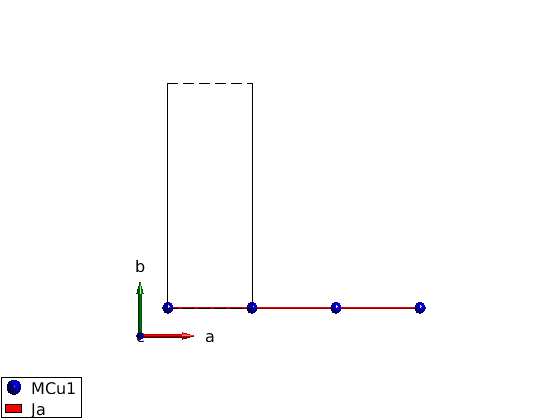

In [9]:
AFMchain.gencoupling('maxDistance',7)
AFMchain.table('bond',[1 2])

AFMchain.addmatrix('label','Ja','value',1,'color','red');
AFMchain.addcoupling('mat','Ja','bond',1);
disp('After assigning a matrix to a bond:')
AFMchain.table('bond',[1 2])
plot(AFMchain,'range',[3 0.9 0.9])


All spins

We define a magnetic supercell 2x1x1 of the crystal cell and define both spin direction in the supercell with the following parameters:

    Magnetic ordering wave vector k = (1/2 0 0)
    
    spins pointing along +/- y direction: S = [[0 1 0]' [0 -1 0]']
    
    Normal to the spin vectors n = (1 0 0)

In [10]:
AFMchain.genmagstr('mode','direct','k',[1/2 0 0],'n',[1 0 0],'S',[0 0; 1 -1;0 0],'nExt',[2 1 1]);

One spin

We define the spin direction in the crystallographic unit cell and let the sw.genmagstr() function generate the other spin based on the magnetic ordering wave vector and normal vectors. This method is usefull for creating complex structures. Both methods gives the same magnetic structure, all stored values in the afchain.mag_str field are the same.

Magnetic structure:

ans =

  2x8 table

    num     matom      idx    S      realFhat         imagFhat           pos              kvect      
    ___    ________    ___    _    _____________    _____________    ___________    _________________

     1     {'MCu1'}     1     1    0     1     0    0     0     1    0    0    0    0.5      0      0
     2     {'MCu1'}     1     1    0    -1     0    0     0    -1    1    0    0    0.5      0      0

Ground state energy: -1.000 meV/spin.
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!


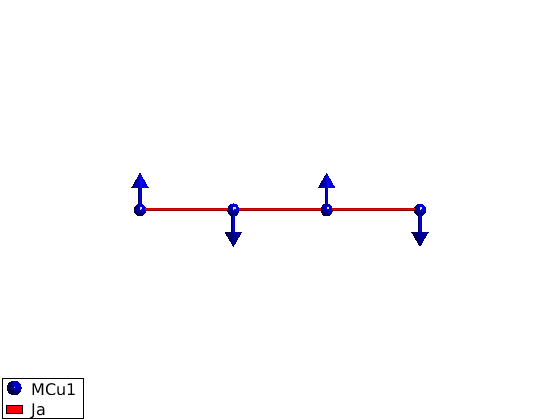

In [11]:
AFMchain.genmagstr('mode','helical','k',[1/2 0 0],'n',[1 0 0],'S',[0; 1; 0],'nExt',[2 1 1]);
disp('Magnetic structure:')
AFMchain.table('mag')

% Ground state energy
AFMchain.energy
plot(AFMchain,'range',[3 0.9 0.9],'cellMode','none','baseMode','none')

 Spin wave spectrum

We calculate the spin wave spectrum and neutron scattering cross sections along the chain direction. The neutron scattering cross section is plotted together with the dispersion (black line).

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 523, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.


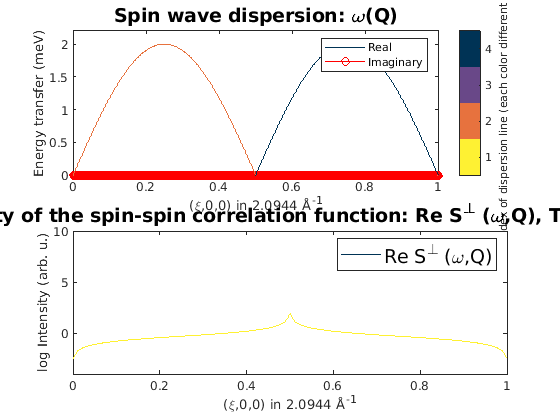

In [12]:
afcSpec = AFMchain.spinwave({[0 0 0] [1 0 0] 523}, 'hermit',true);
figure
subplot(2,1,1)
sw_plotspec(afcSpec,'mode',4,'dE',0.2,'axLim',[0 3])

% To calculate the intensity, we need to sum up the intensity of the two
% degenerate spin wave mode using the sw_omegasum() function. We plot the
% logarithm of the intensity.

afcSpec = sw_neutron(afcSpec);
afcSpec = sw_egrid(afcSpec,'Evect',linspace(0,6.5,500),'component','Sperp');
afcSpec = sw_omegasum(afcSpec,'zeroint',1e-6);
subplot(2,1,2)
sw_plotspec(afcSpec,'mode',2,'log',true,'axLim',[-4 10])

% Position the figure on the screen, similarly how subplot() positions the
% axes on the figure.
swplot.subfigure(1,3,1)

## Tutorial 3

Lattice

Magnetic lattice:

ans =

  1x4 table

     matom     idx    S        pos    
    _______    ___    _    ___________

    {'Cu1'}     1     1    0    0    0

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!


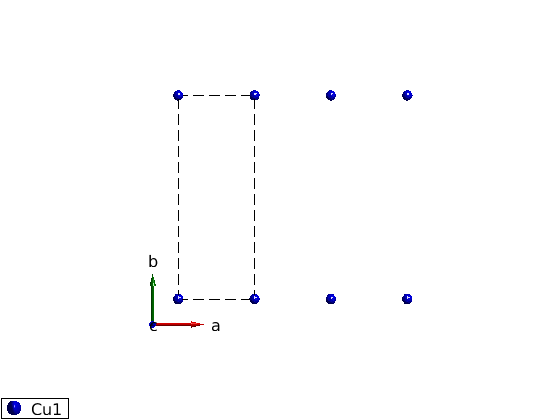

In [13]:
J1J2chain = spinw;
J1J2chain.genlattice('lat_const',[3 8 10],'angled',[90 90 90],'spgr',0);
J1J2chain.addatom('r',[0 0 0],'S',1,'label','Cu1','color','blue');
disp('Magnetic lattice:')
J1J2chain.table('atom')
plot(J1J2chain,'range',[3 1 1],'zoom',0.5)


Couplings

First and second neighbor antiferromagnetic couplings. If the name of the matrix ends with '-' the bond is plotted with dashed line.

Creating the bond list (maxDistance = 7 , nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!
Bonds:

ans =

  2x10 table

    idx    subidx        dl             dr         length    matom1     idx1    matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    _______    ____    _______    ____    ______________________________________

     1       1       1    0    0    1    0    0      3       {'Cu1'}     1      {'Cu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}
     2       1       2    0    0    2    0    0      6       {'Cu1'}     1      {'Cu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!


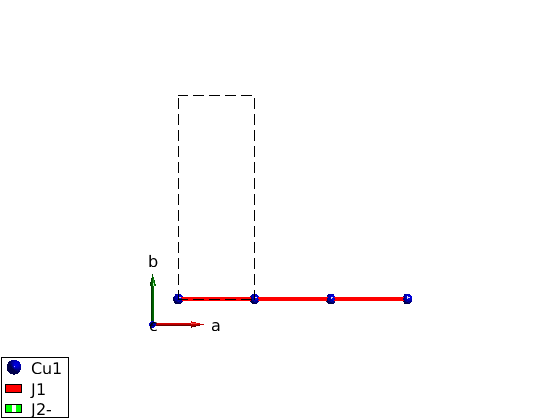

In [14]:
J1J2chain.gencoupling('maxDistance',7);
disp('Bonds:')
J1J2chain.table('bond',[])

J1J2chain.addmatrix('label','J1', 'value',-1,'color','r');
J1J2chain.addmatrix('label','J2-','value', 2,'color','g');

J1J2chain.addcoupling('mat','J1','bond',1);
J1J2chain.addcoupling('mat','J2-','bond',2);
plot(J1J2chain,'range',[3 0.9 0.9],'bondMode','line','bondLinewidth0',3)

_Magnetic structure is a helix_

We use two different methods to define the ground state magnetic structure:

Direct input

If we would know the exact solution of the spin Hamiltonian we can input that, assuming a helix with the following parameters:

    Magnetic ordering wave vector k = (1/4 0 0)
    
    Spins lying in arbitrary plane, first spin S = (1 0 0)
    
    Normal to the plane of the spin helix has to be perpendicular to S, we choose it n = (0 0 1)
    
    We won't use a magnetic supercell, not necessary

Magnetic structure:

ans =

  1x8 table

    num     matom     idx    S     realFhat       imagFhat          pos               kvect        
    ___    _______    ___    _    ___________    ___________    ___________    ____________________

     1     {'Cu1'}     1     1    1    0    0    0    1    0    0    0    0    0.25       0       0

Ground state energy before optimization:
Ground state energy: -2.000 meV/spin.
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 1k vertices are drawn!


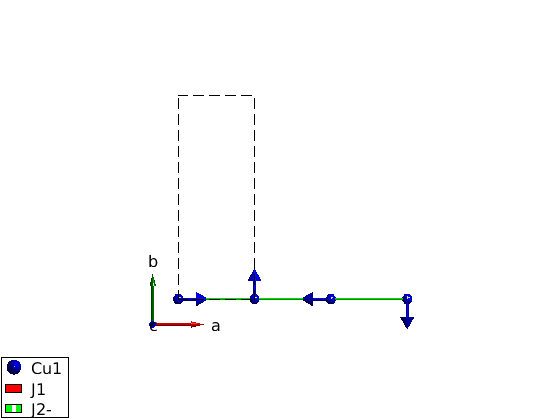

In [15]:
J1J2chain.genmagstr('mode','helical', 'k',[0.25 0 0], 'n',[0 0 1], 'S',[1; 0; 0], 'nExt',[1 1 1])
disp('Magnetic structure:')
J1J2chain.table('mag')
disp('Ground state energy before optimization:')
J1J2chain.energy

plot(J1J2chain,'range',[3 0.9 0.9])

Optimise the helix pitch angle

We are unsure about the right pitch angle of the helix, thus we want to calculate it. The sw.optmagstr() is able to determine the magnetic ground state. It uses a constraint function (@gm_planar in this case) to reduce the number of paramteres that has to be optimised. It works well if the number of free parameters are low. we will find the the right k-vector is 0.2301.

                                        
 10.00%, remained: 000:00:01 (HH:MM:SS).
 20.00%, remained: 000:00:00 (HH:MM:SS).
 30.00%, remained: 000:00:00 (HH:MM:SS).
 40.00%, remained: 000:00:00 (HH:MM:SS).
 50.00%, remained: 000:00:00 (HH:MM:SS).
 60.00%, remained: 000:00:00 (HH:MM:SS).
 70.00%, remained: 000:00:00 (HH:MM:SS).
 80.00%, remained: 000:00:00 (HH:MM:SS).
 90.00%, remained: 000:00:00 (HH:MM:SS).
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Ground state energy after optimization
Ground state energy: -2.062 meV/spin.
Optimized magnetic structure:

ans =

  1x8 table

    num     matom     idx    S     realFhat       imagFhat          pos                    kvect            
    ___    _______    ___    _    ___________    ___________    ___________    _____________________________

     1     {'Cu1'}     1     1    1    0    0    0    1    0    0    0    0    0.23005          0          0

Creating 3D plot... 
> In swplot.

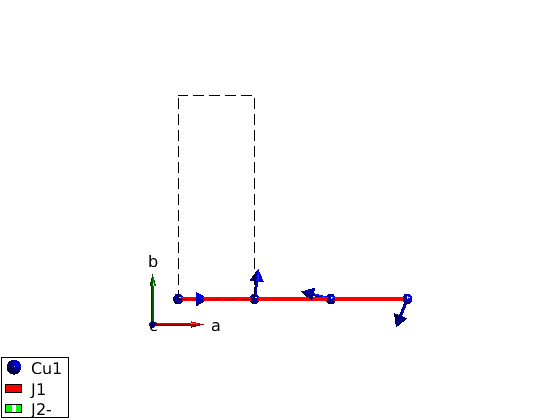

In [16]:
%     Phi1 k_x k_y k_z nTheta nPhi
x1 = [0      0   0   0      0    0];
x2 = [0    1/2   0   0      0    0];
optRes = J1J2chain.optmagstr('func',@gm_planar,'xmin',x1,'xmax',x2,'nRun',10);
disp('Ground state energy after optimization')
J1J2chain.energy
disp('Optimized magnetic structure:')
J1J2chain.table('mag')

plot(J1J2chain,'range',[3 0.9 0.9],'bondMode','line','bondLineWidth0',3)

Spin wave spectrum

We calculate the spin wave spectrum, the code automatically uses the method that enables the spin wave calculation of incommensurate structures withouth creating a magnetic supercell. There are three spin wave modes, these are omega(Q), omega(Q+/-k). The two shifted ones are due to the incommensurate structure.

Calculating INCOMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 1200, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.
> In spinw/spinwave (line 1067)


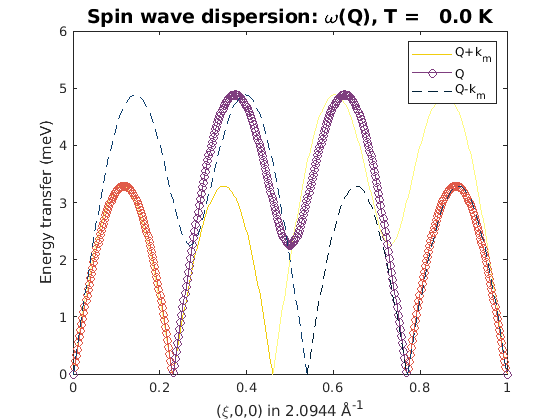

In [17]:
J1J2spec= J1J2chain.spinwave({[0 0 0] [1 0 0] 400}, 'hermit',false);
J1J2spec = sw_neutron(J1J2spec);
J1J2spec = sw_egrid(J1J2spec, 'Evect',linspace(0,6.5,100));
figure
sw_plotspec(J1J2spec, 'mode',1,'colorbar',false)
axis([0 1 0 6])

## Tutorial 17

Lattice

In [18]:
FMchain = spinw;
FMchain.symbolic(true)

FMchain.genlattice('lat_const',[3 4 4])
FMchain.addatom('label','A1','r',[0 0 0],'S',1)
disp('Symbolic spin value:')
FMchain.unit_cell.S
FMchain.gencoupling

> In sw_mff (line 118)
In spinw/addatom (line 282)
> In sw_cff (line 100)
In spinw/addatom (line 320)
> In sw_nb (line 83)
In spinw/addatom (line 343)
Symbolic spin value:
 
ans =
 
S_1
 
Creating the bond list (maxDistance = 8 , nCell = 3x3x3)...
...20 bonds are retained out of 196 generated!


Magnetic Hamiltonian

When we define the magnetic Hamiltonian, the sw.matrix.mat matrix will contain symbolic values. The values will be the symbolic variable created from the 'label' option and the 'value' matrix. If the input for the 'value' option is symbolic, then it is directly assigned to the sw.matrix.mat field. For the sw.addcoupling(), sw.addaniso(), sw.addg() functions the 'label' value of the matrix has to be used instead of the stored symbolic values. It simplifies the calculation if appropriate assumptions are given for the symbolic variables. In our case, we assume J is positive and use -J for the coupling.

Symbolic matrix value from double type input:
 
ans =
 
[J1/2,    0,    0]
[   0, J1/2,    0]
[   0,    0, J1/2]
 
Symbolic matrix value from symbolic input:
 
ans =
 
[-J,  0,  0]
[ 0, -J,  0]
[ 0,  0, -J]
 
> In spinw/addcoupling (line 220)
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!


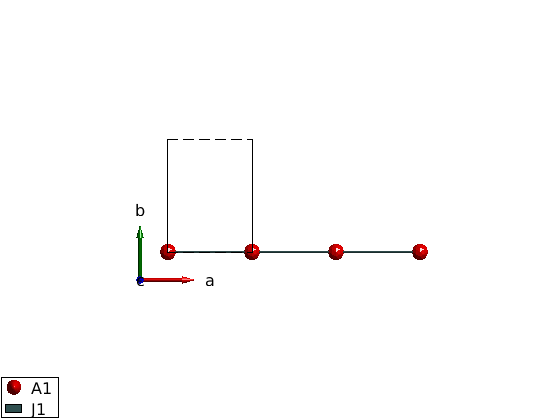

In [21]:
FMchain.addmatrix('label','J1','value',1/2)
disp('Symbolic matrix value from double type input:')
FMchain.matrix.mat

FMchain.addmatrix('label','J1','value',-sym('J','positive'))
disp('Symbolic matrix value from symbolic input:')
FMchain.matrix.mat

FMchain.addcoupling('mat','J1','bond',1)
plot(FMchain,'range',[3 0.5 0.5])

Magnetic structure

We can define the magnetic structure as usuall. The normalized symbolic spin components will be created. Beside the magnetic structure can be also created using symbolic input variables, for example incommensurate k-vector, etc.

 
ans =
 
  0
S_1
  0
 
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
> In swplot.plotmag (line 212)
In spinw/plot (line 295)
...2k faces and 1k vertices are drawn!


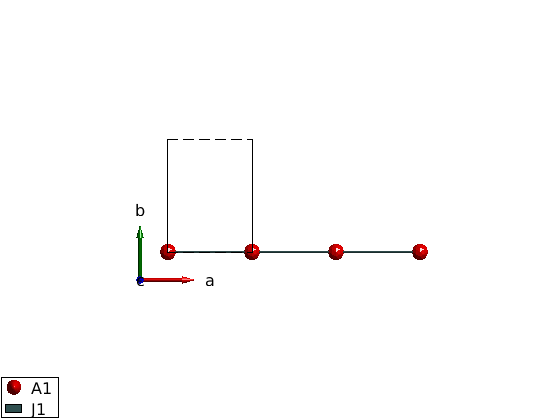

In [23]:
FMchain.genmagstr('mode','helical','S',[0; 1; 0])
FMchain.magtable.M
plot(FMchain,'range',[3 0.5 0.5],'zoom',1)

Ground state energy

The ground state energy can be calculated for symbolic mode as well.

In [24]:
disp('Ground state energy meV/spin:')
FMchain.energy

Ground state energy meV/spin:
Ground state energy (1/spin):
           2
E == -J S_1



Spin Wave dispersion

For symbolic mode, only the spin wave dispersion can be calculated calling the sw.spinwave function. It produces the general dispersion withouth any additional input. We note that the final result is not in a nice form, but this is the limitation of the simplify() function of the symbolic engine.

In [25]:
FMspec = FMchain.spinwave();
pretty(FMspec.omega)

> In spinw/spinwave (line 267)
Calculating SYMBOLIC COMMENSURATE spin wave spectra (nMagExt = 1)...
Calculating SYMBOLIC eigenvalues... ready!
/                                        2 \
|  J S_1 exp(-pi h 2i) (exp(pi h 2i) - 1)  |
|                                          |
|                                        2 |
\ -J S_1 exp(-pi h 2i) (exp(pi h 2i) - 1)  /



Spin wave spectrum

For plotting we need to calculate the spin wave spectrum at given Q point, here along the (H,0,0) direction using the eval() function.

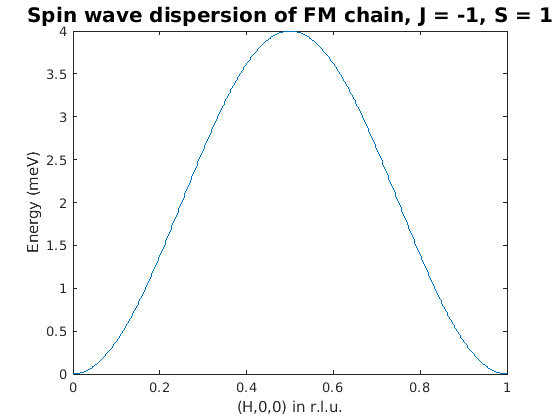

In [26]:
h   = linspace(0,1,501);
J   = 1;
S_1 = 1;
w = real(eval(FMspec.omega(2)));

figure
plot(h,w)
xlabel('(H,0,0) in r.l.u.')
ylabel('Energy (meV)')
title('Spin wave dispersion of FM chain, J = -1, S = 1','fontsize',15)